**Task-> Exploratory Data Analysis - Terrorism**

Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Importing the dataset

In [3]:
df = pd.read_csv('/content/drive/MyDrive/globalterrorismdb_0718dist.csv', encoding='latin1')

Understanding the data

In [4]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [5]:
df.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,2.0,0,The incident occurred near the town of Balcad.,12/31/2017: Assailants opened fire on a Somali...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,4,Military,36.0,Military Checkpoint,Somali National Army (SNA),Checkpoint,...,NaN,NaN,NaN,1.0,0.0,0.0,2.0,0.0,0.0,-9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,Middle East & North Africa,Lattakia,Jableh,35.407278,35.942679,1.0,1,The incident occurred at the Humaymim Airport.,12/31/2017: Assailants launched mortars at the...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,4,Military,27.0,Military Barracks/Base/Headquarters/Checkpost,Russian Air Force,Hmeymim Air Base,...,NaN,NaN,Mortars were used in the attack.,2.0,0.0,0.0,7.0,0.0,0.0,1,4.0,Unknown,-99.0,Seven military planes were damaged in this att...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,Southeast Asia,Maguindanao,Kubentog,6.900742,124.437908,2.0,0,The incident occurred in the Datu Hoffer distr...,12/31/2017: Assailants set fire to houses in K...,1,1,1,0.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,14,Private Citizens & Property,76.0,House/Apartment/Residence,Not Applicable,Houses,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1,4.0,Unknown,-99.0,Houses were damaged in this attack.,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,South Asia,Manipur,Imphal,24.798346,93.940430,1.0,0,The incident occurred in the Mantripukhri neig...,12/31/2017: Assailants threw a grenade at a Fo...,1,1,1,0.0,NaN,NaN,0.0,0,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,2,Government (General),21.0,Government Building/Facility/Office,Forest Department Manipur,Office,...,NaN,NaN,A thrown grenade was used in the attack.,0.0,0.0,0.0,0.0,0.0,0.0,-9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,Southeast Asia,Maguindanao,Cotabato City,7.209594,124.241966,1.0,0,NaN,12/31/2017: An explosive device was discovered...,1,1,1,0.0,NaN,NaN,0.0,0,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,20,Unknown,NaN,NaN,Unknown,Unknown,...,NaN,NaN,An explosive device containing a detonating co...,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [7]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,181691.000000,181691.000000,181691.000000,181691.000000,181690.000000,29011.000000,181690.000000,181691.000000,181691.000000,181691.000000,6314.000000,428.000000,181691.000000,171318.000000,180132.000000,11144.000000,10685.000000,10828.000000,1176.000000,1097.000000,1147.000000,181311.000000,1955.000000,320.000000,181691.000000,110576.000000,112202.000000,115571.000000,19083.000000,1890.000000,616.000000,318.000000,133.000000,4839.000000,181691.000000,160923.000000,13127.000000,11542.000000,1863.000000,1693.000000,73.000000,70.000000,171378.000000,117245.000000,114733.000000,165380.000000,116989.000000,112548.000000,181691.000000,64065.000000,3.898900e+04,181513.000000,13572.000000,13517.000000,4063.000000,8124.000000,77381.000000,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,0.068297,0.988530,0.993093,0.875668,-0.523171,1.292923,0.137773,0.889598,0.036507,3.247547,3.719512,5.245327,8.439719,46.971474,127.686441,10.247218,55.311652,131.179442,10.021259,55.548769,144.564952,0.081440,0.265473,0.193750,0.002950,-65.361154,-1.517727,0.049666,7.022848,0.247619,7.176948,0.411950,6.729323,-6.296342,6.447325,11.117162,6.812524,10.754029,6.911433,11.643237,6.246575,10.842857,2.403272,0.045981,0.508058,3.167668,0.038944,0.107163,-0.544556,3.295403,2.088119e+05,0.059054,4.533230,-0.353999,-46.793933,-32.516371,-0.145811,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,0.284553,0.106483,0.082823,0.329961,2.455819,0.703729,0.344663,0.313391,0.187549,1.915772,2.272023,2.246642,6.653838,30.953357,89.299120,5.709076,25.640310,125.951485,5.723447,26.288955,163.299295,0.273511,0.441698,0.395854,0.054234,216.536633,12.830346,1.093195,2.476851,0.974018,2.783725,0.492962,2.908003,4.234620,2.173435,6.495612,2.277081,7.594574,2.177956,8.493166,1.507212,8.192672,11.545741,5.681854,4.199937,35.949392,3.057361,1.488881,3.122889,0.486912,1.552463e+07,0.461244,202.316386,6.835645,82.800405,121.209205,1.207861,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,-9.000000,1.000000,0.000000,1.000000,-9.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,-9.900000e+01,-9.000000,-99.000000,-99.000000,-99.000000,-99.000000,-9.000000,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000

In [8]:
df.corr()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
eventid,1.000000,0.999996,0.002706,0.018336,0.091761,-0.135039,0.401371,0.166886,0.003907,0.030641,0.070646,0.002019,0.026215,-0.016789,0.298888,0.041344,0.093720,-0.082972,0.137743,0.074173,0.071982,0.189245,0.079080,0.048798,-0.019084,0.097623,0.111425,-0.082822,0.156170,0.090551,0.039081,0.040647,-0.066449,-0.177867,0.017939,-0.137408,0.428397,0.141600,0.110578,0.033917,0.038996,-0.318032,-0.146094,0.398728,-0.011716,0.101733,0.101045,0.041027,0.081357,0.090000,-0.138596,0.027110,0.015351,-0.013808,0.027579,0.015282,-0.029348,0.027904,-0.278927,-0.150677,-0.013498,-0.010146,0.006369,-0.010082,-0.493414,-0.169859,-0.241986,-0.009990,-0.018001,-0.014094,-0.165422,0.256113,-0.181612,-0.143600,-0.133252,-0.077852,-0.175605
iyear,0.999996,1.000000,0.000139,0.018254,0.091754,-0.135023,0.401384,0.166933,0.003917,0.030626,0.070659,0.001995,0.026211,-0.016784,0.298920,0.041367,0.093736,-0.082963,0.137736,0.074153,0.072177,0.189454,0.079082,0.048794,-0.019068,0.097552,0.111364,-0.082784,0.155939,0.090345,0.038941,0.040656,-0.066417,-0.177591,0.017944,-0.137459,0.428278,0.141486,0.110542,0.034143,0.039172,-0.318815,-0.145529,0.398227,-0.011737,0.101727,0.101036,0.040990,0.081342,0.090267,-0.138298,0.026855,0.015341,-0.013828,0.027563,0.015273,-0.029357,0.027879,-0.278916,-0.150690,-0.013490,-0.010159,0.006342,-0.010093,-0.493378,-0.169931,-0.241764,-0.009984,-0.018216,-0.014238,-0.165375,0.256092,-0.181556,-0.143601,-0.133253,-0.077847,-0.175596
imonth,0.002706,0.000139,1.000000,0.005497,-0.000468,-0.006305,-0.002999,-0.015978,-0.003880,0.003621,-0.004501,0.001568,0.001734,0.000176,-0.012477,-0.011762,-0.004422,-0.002845,0.003071,0.006705,-0.029027,-0.039298,-0.000948,0.001508,-0.004838,0.019584,0.016365,-0.006315,0.059489,0.052698,0.036580,-0.004460,-0.008286,-0.054490,-0.001661,0.014354,0.019890,0.023083,0.013361,-0.040736,-0.040042,0.147710,-0.156620,0.144738,0.007863,0.002142,0.000581,0.009567,-0.020514,-0.086445,-0.062079,0.058090,0.003463,0.003891,0.003462,0.002938,0.001467,0.005091,-0.005816,0.001027,-0.003279,0.003397,0.011226,0.003746,-0.015730,0.002131,-0.070199,-0.000710,0.046989,0.058878,-0.016597,0.011295,-0.011535,-0.002302,-0.002034,-0.002554,-0.006336
iday,0.018336,0.018254,0.005497,1.000000,-0.004700,0.003468,0.009710,0.003423,-0.002285,-0.006991,-0.005367,0.011434,-0.002702,-0.004889,0.002395,-0.007817,-0.000395,-0.011802,0.003593,-0.005333,0.014498,-0.080422,-0.000052,-0.003184,0.003845,0.008964,0.011289,-0.017420,-0.056251,-0.044442,-0.018528,-0.002186,0.041395,-0.039794,-0.003788,-0.013527,0.003300,0.004474,0.003635,-0.031937,0.029723,0.149860,0.106259,0.029735,-0.003019,0.006182,0.017279,-0.005912,0.043226,-0.000417,-0.005110,0.073744,-0.003693,-0.001987,-0.002012,-0.001268,0.001392,0.001812,-0.003903,-0.012729,-0.001093,0.004077,-0.020800,-0.002318,-0.036193,0.019856,0.001206,0.012755,-0.010502,0.003148,-0.006581,-0.006706,0.001765,-0.001540,-0.001621,-0.002027,-0.001199
extended,0.091761,0.091754,-0.000468,-0.004700,1.000000,-0.020466,0.038389,-0.024749,0.000523,0.057897,0.017784,-0.015029,0.001249,0.048533,0.011638,0.096563,-0.013440,0.073233,-0.033961,0.272272,-0.035143,-0.040606,0.011613,0.022996,0.013609,-0.031271,-0.014091,0.040233,0.032853,0.035114,0.014293,0.033464,-0.056545,-0.030

In [9]:
df.value_counts

<bound method DataFrame.value_counts of              eventid  iyear  imonth  iday  ... INT_IDEO  INT_MISC INT_ANY  related
0       197000000001   1970       7     2  ...        0         0       0      NaN
1       197000000002   1970       0     0  ...        1         1       1      NaN
2       197001000001   1970       1     0  ...       -9         1       1      NaN
3       197001000002   1970       1     0  ...       -9         1       1      NaN
4       197001000003   1970       1     0  ...       -9         1       1      NaN
...              ...    ...     ...   ...  ...      ...       ...     ...      ...
181686  201712310022   2017      12    31  ...        0         0       0      NaN
181687  201712310029   2017      12    31  ...       -9         1       1      NaN
181688  201712310030   2017      12    31  ...        0         0       0      NaN
181689  201712310031   2017      12    31  ...       -9         0      -9      NaN
181690  201712310032   2017      12    31  ... 

In [10]:
df.dtypes

eventid        int64
iyear          int64
imonth         int64
iday           int64
approxdate    object
               ...  
INT_LOG        int64
INT_IDEO       int64
INT_MISC       int64
INT_ANY        int64
related       object
Length: 135, dtype: object

In [11]:
df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [12]:
df.duplicated().sum()

0

Renaming and selecting the relevant columns

In [13]:
df.rename(columns={'iyear':'Year','imonth':'Month','extended':'Extended','iday':'Day','country_txt':'CountryName',
                   'provstate':'State', 'country':'CountryCode','region':'RegionCode','city':'City','latitude':'Latitude',
                   'longitude':'Longitude','region_txt':'RegionName','attacktype1_txt':'AttackType','target1':'Specific_Target',
                   'nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1':'TargetCode',
                   'targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','weaptype1':'WeaponCode','motive':'Motive'},
          inplace=True)

df=df[['Year','Month','Day','Extended','CountryCode','CountryName','State','RegionCode','RegionName','City','Latitude',
       'Longitude','AttackType','Killed','Wounded','Specific_Target','TargetCode','Target_type','Summary','Group',
       'WeaponCode','Weapon_type','Motive']]

In [14]:
df.sample(4)

,Year,Month,Day,Extended,CountryCode,CountryName,State,RegionCode,RegionName,City,Latitude,Longitude,AttackType,Killed,Wounded,Specific_Target,TargetCode,Target_type,Summary,Group,WeaponCode,Weapon_type,Motive
25730,1985,7,15,0,155,West Bank and Gaza Strip,Gaza Strip,10,Middle East & North Africa,Rafah,31.278791,34.256435,Facility/Infrastructure Attack,0.0,2.0,Zionist Military administration's building,4,Military,NaN,Unknown,8,Incendiary,NaN
151937,2015,8,17,0,95,Iraq,Baghdad,10,Middle East & North Africa,Baghdad,33.303566,44.371773,Bombing/Explosion,2.0,6.0,Market,14,Private Citizens & Property,08/17/2015: An explosive device detonated near...,Unknown,6,Explosives,NaN
101836,2011,6,1,0,4,Afghanistan,Ghazni,6,South Asia,Ghazni,33.542622,68.415329,Bombing/Explosion,0.0,0.0,A communications tower,16,Telecommunication,"06/01/2011: On Wednesday afternoon, in Ghazni ...",Unknown,6,Explosives,The specific motive for the attack is unknown.
43038,1990,6,20,0,185,Spain,Basque Country,8,Western Europe,Bilbao,43.258434,-2.921819,Bombing/Explosion,0.0,0.0,Policeman's private car,3,Police,NaN,Basque Fatherland and Freedom (ETA),6,Explosives,NaN


In [15]:
df['RegionName'].value_counts() 

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: RegionName, dtype: int64

Exploratory Data Analysis (EDA)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

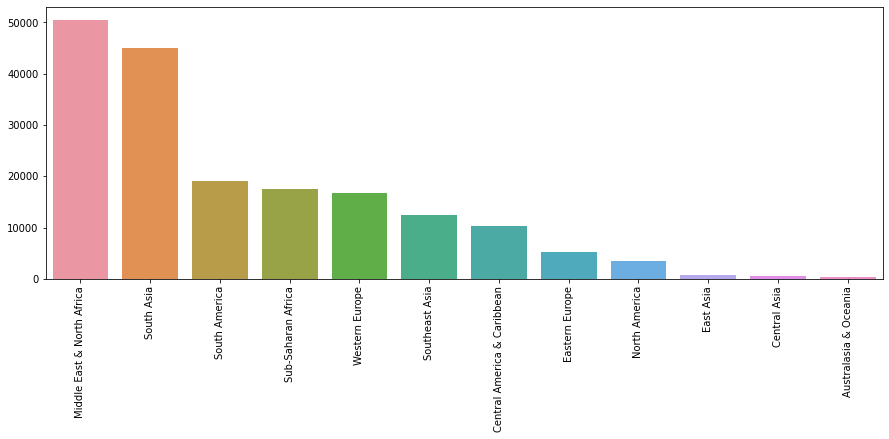

In [20]:
plt.figure(figsize = (15,5))
sns.barplot(df['RegionName'].value_counts()[:12].index,df['RegionName'].value_counts()[:12].values)
plt.xticks(rotation = 90)

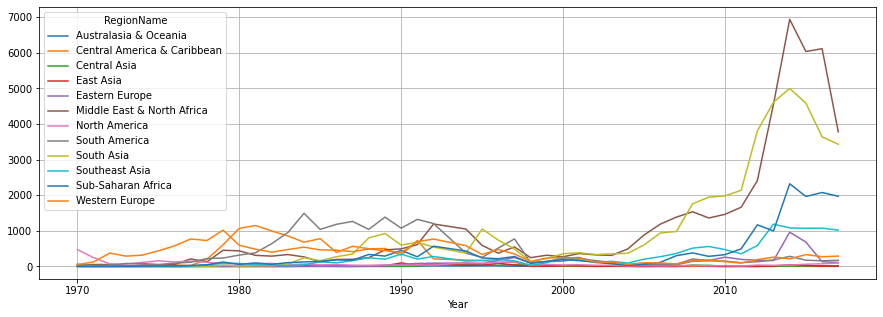

In [19]:
pd.crosstab(df.Year, df.RegionName).plot(kind='line',figsize=(15,5))
plt.grid()

In [21]:
df['CountryName'].value_counts() 

Iraq                   24636
Pakistan               14368
Afghanistan            12731
India                  11960
Colombia                8306
                       ...  
International              1
Wallis and Futuna          1
South Vietnam              1
Andorra                    1
Antigua and Barbuda        1
Name: CountryName, Length: 205, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

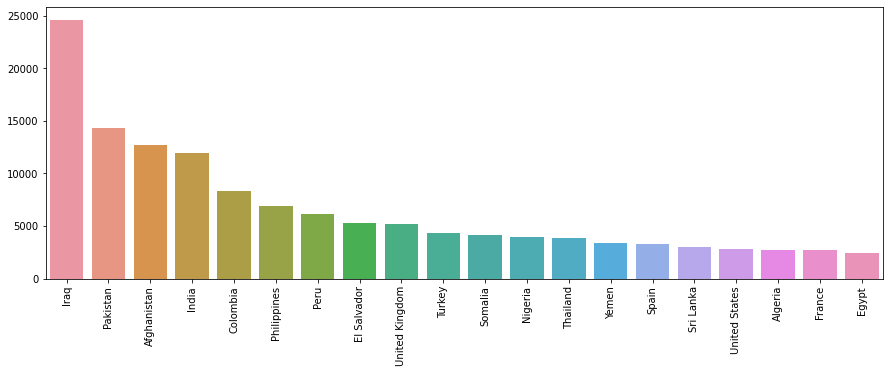

In [23]:
plt.figure(figsize = (15,5))
sns.barplot(df['CountryName'].value_counts()[:20].index,df['CountryName'].value_counts()[:20].values)
plt.xticks(rotation = 90)

In [24]:
df['State'].value_counts() 

Baghdad                  7645
Northern Ireland         4498
Unknown                  4290
Balochistan              3710
Saladin                  3411
                         ... 
Federal Territory           1
Topaz (Province)            1
Obilic (Municipality)       1
East Timor (Region)         1
Vidzeme                     1
Name: State, Length: 2855, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

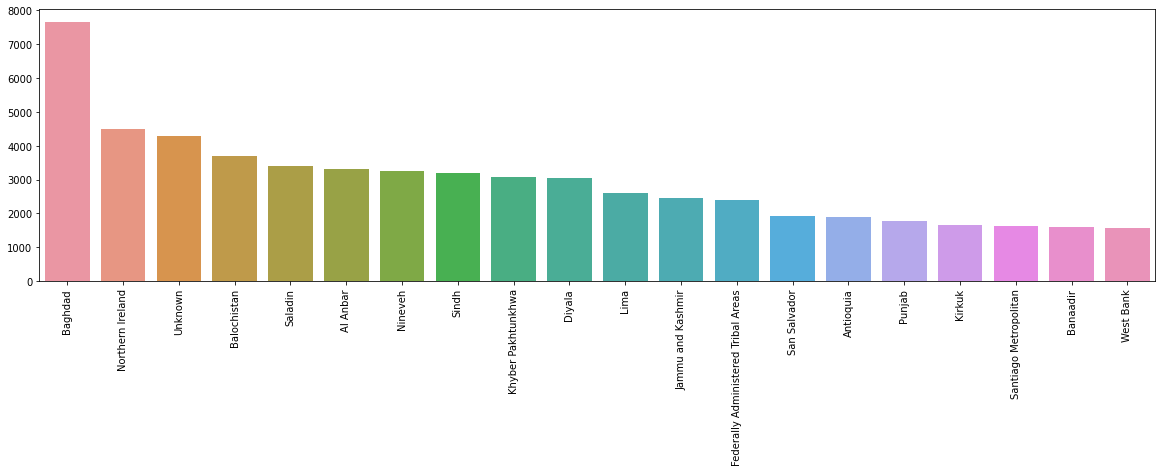

In [25]:
plt.figure(figsize = (20,5))
sns.barplot(df['State'].value_counts()[:20].index,df['State'].value_counts()[:20].values)
plt.xticks(rotation = 90)

In [26]:
df['City'].value_counts() 

Unknown      9775
Baghdad      7589
Karachi      2652
Lima         2359
Mosul        2265
             ... 
Hotwag          1
Ostend          1
Balughata       1
Jikoyi          1
Kubentog        1
Name: City, Length: 36674, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

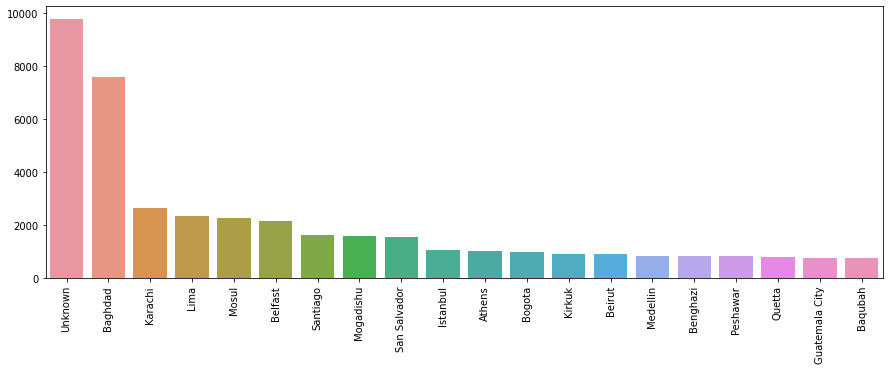

In [27]:
plt.figure(figsize = (15,5))
sns.barplot(df['City'].value_counts()[:20].index,df['City'].value_counts()[:20].values)
plt.xticks(rotation = 90)

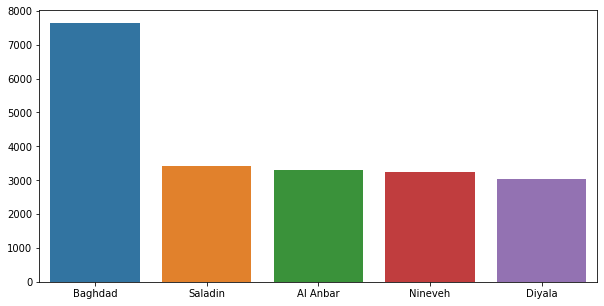

In [29]:
df_st1=df[df['CountryName']=='Iraq']['State']
plt.figure(figsize = (10,5))
sns.barplot(df_st1.value_counts()[:5].index,df_st1.value_counts()[:5].values)

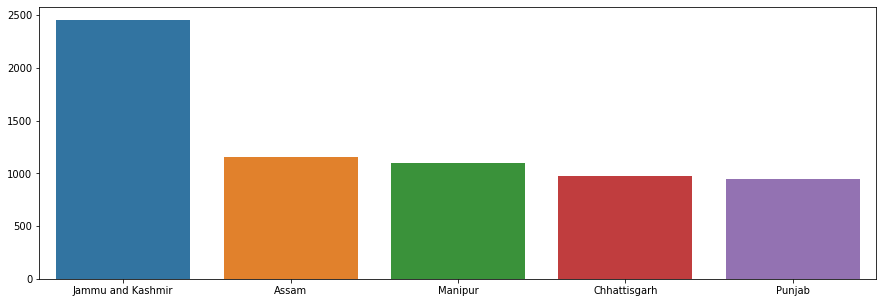

In [31]:
df_st2=df[df['CountryName']=='India']['State']
plt.figure(figsize = (15,5))
sns.barplot(df_st2.value_counts()[:5].index,df_st2.value_counts()[:5].values)

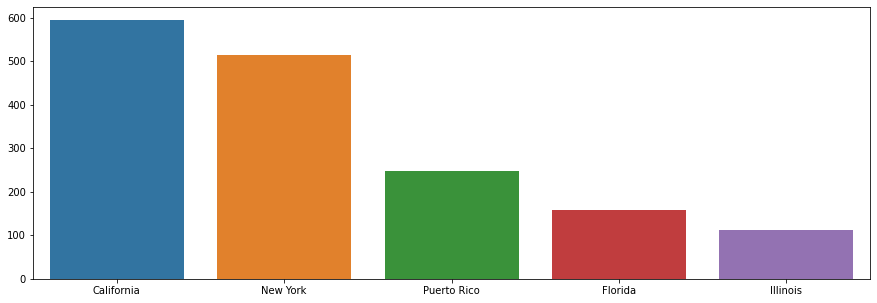

In [32]:
df_st3=df[df['CountryName']=='United States']['State']
plt.figure(figsize = (15,5))
sns.barplot(df_st3.value_counts()[:5].index,df_st3.value_counts()[:5].values)

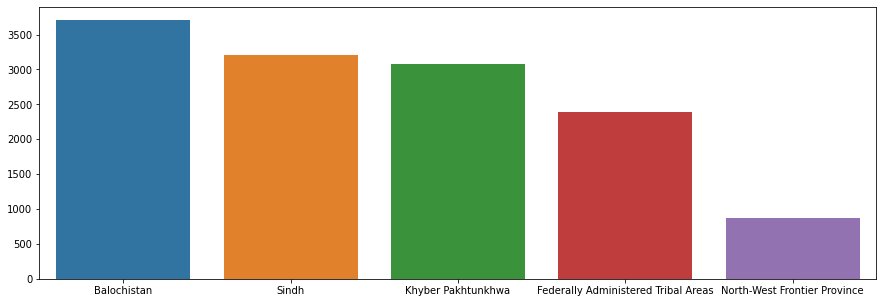

In [34]:
df_st4=df[df['CountryName']=='Pakistan']['State']
plt.figure(figsize = (15,5))
sns.barplot(df_st4.value_counts()[:5].index,df_st4.value_counts()[:5].values)

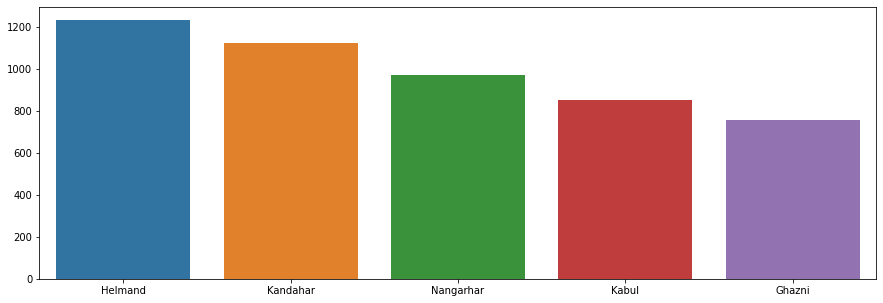

In [35]:
df_st5=df[df['CountryName']=='Afghanistan']['State']
plt.figure(figsize = (15,5))
sns.barplot(df_st5.value_counts()[:5].index,df_st5.value_counts()[:5].values)

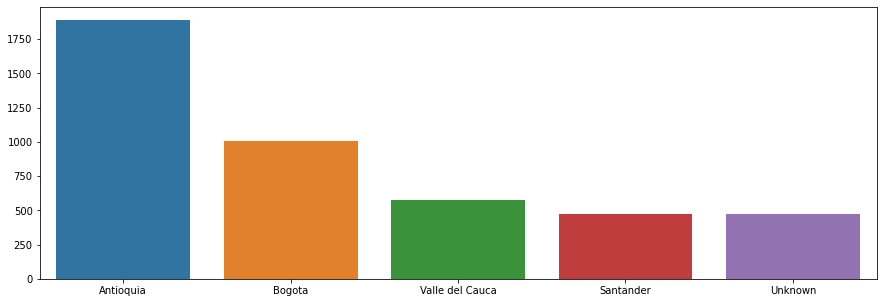

In [36]:
df_st6=df[df['CountryName']=='Colombia']['State']
plt.figure(figsize = (15,5))
sns.barplot(df_st6.value_counts()[:5].index,df_st6.value_counts()[:5].values)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 <a list of 47 Text major ticklabel objects>)

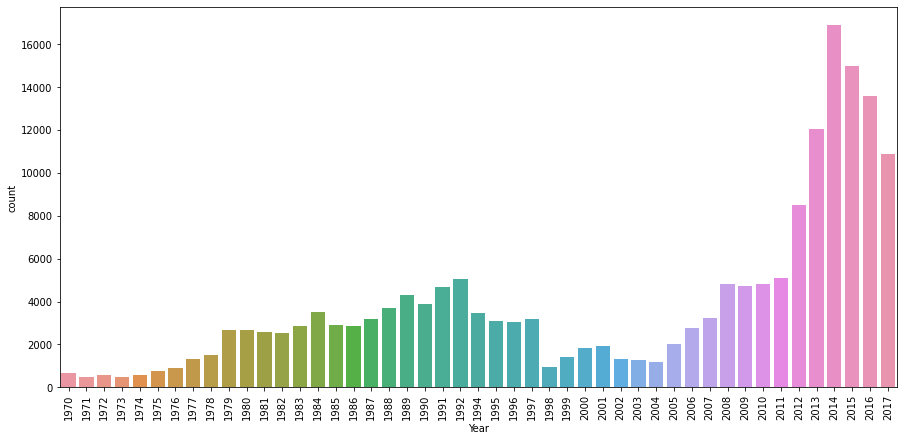

In [37]:
plt.figure(figsize = (15,7))
sns.countplot('Year',data=df)
plt.xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

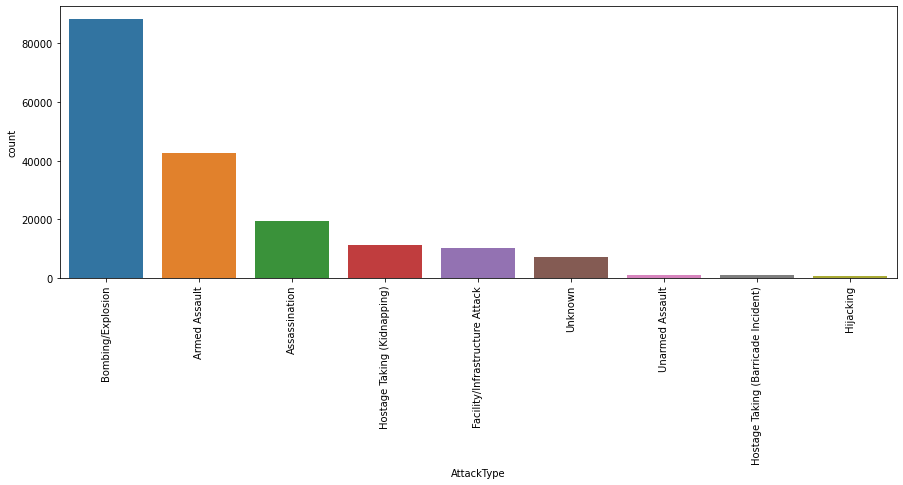

In [38]:
plt.figure(figsize = (15,5))
sns.countplot(df['AttackType'],order = df['AttackType'].value_counts().index)
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text major ticklabel objects>)

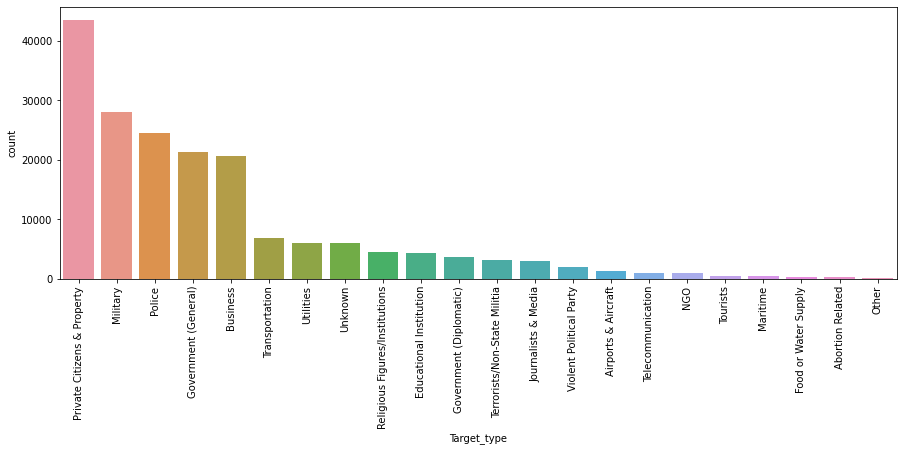

In [39]:
plt.figure(figsize = (15,5))
sns.countplot(x="Target_type", data=df, order=df["Target_type"].value_counts().index)
plt.xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

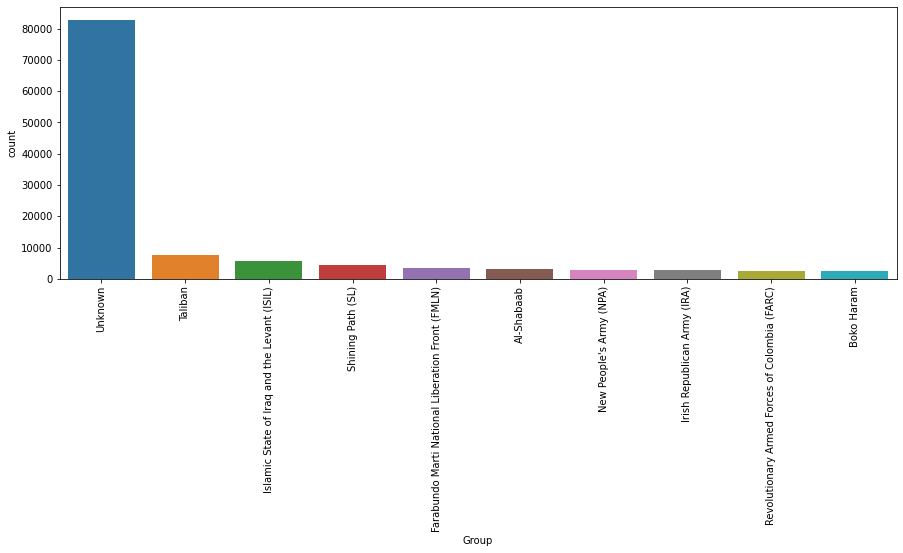

In [40]:
plt.figure(figsize = (15,5))
sns.countplot(x="Group", data=df, order=df["Group"].value_counts()[:10].index)
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

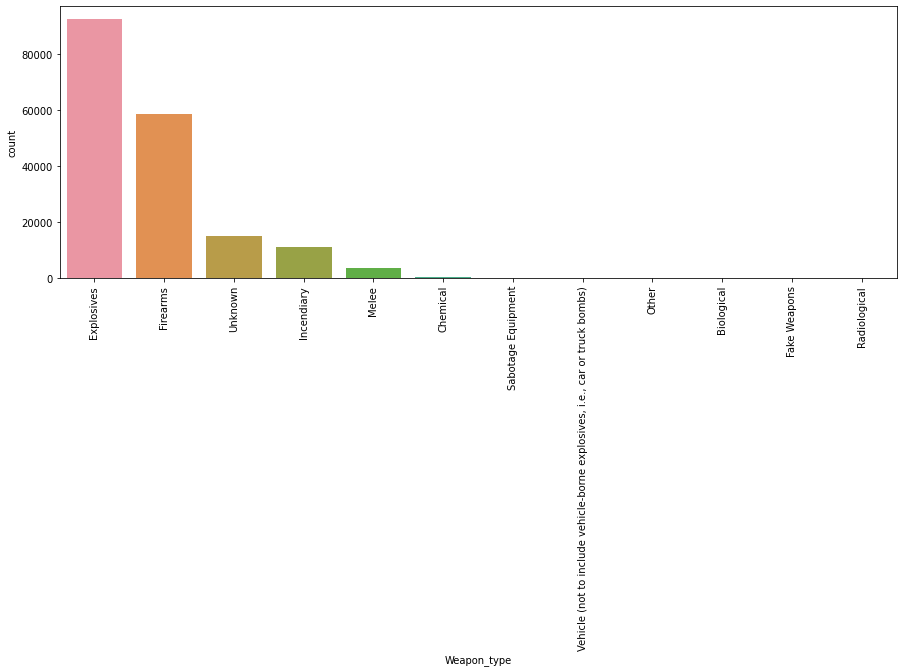

In [41]:
plt.figure(figsize = (15,5))
sns.countplot(df['Weapon_type'],order = df['Weapon_type'].value_counts()[:15].index)
plt.xticks(rotation = 90)

Conclusions drawn from this EDA:
1. Most affected region is Middle East & North Africa and least affected region is Australasia & Oceania.
2. Terrorists activities spiked after 2010.
3. Top Most affected countries are - Iraq , Pakistan ,Afghanistan ,India and Colombia.
4. Top 3 most affected states are - Baghdad, Northern Ireland, Balochistan.
5. Baghdad and Karachi are the most affected cities worldwide.
6. Jammu n Kashmir is the most affected state in India and Srinagar the most affected City.
7. Explosives and Firearms are the most used weapons by terrorists group.
8. Private Citizens, Property, Military, Police and the Government are the most targeted victim groups.
9.Terrorists mostly attack by bombing , explosives or by armed assaults and least by Hijacking.
10. Amongst the top 10 affected countries in the world, 5 countries are Asian.
Highest number of attacks happened in 2014 and least happened in 1971.
**The most active terrorist group in the world is TALIBAN.**